## Instalación de librerías

In [140]:
#!pip install sklearn

# Importamos librerías

In [141]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from copy import deepcopy

# Leemos los datos

In [142]:
data = pd.read_csv('data_sxYsUL3Z.csv', header=None).to_numpy()

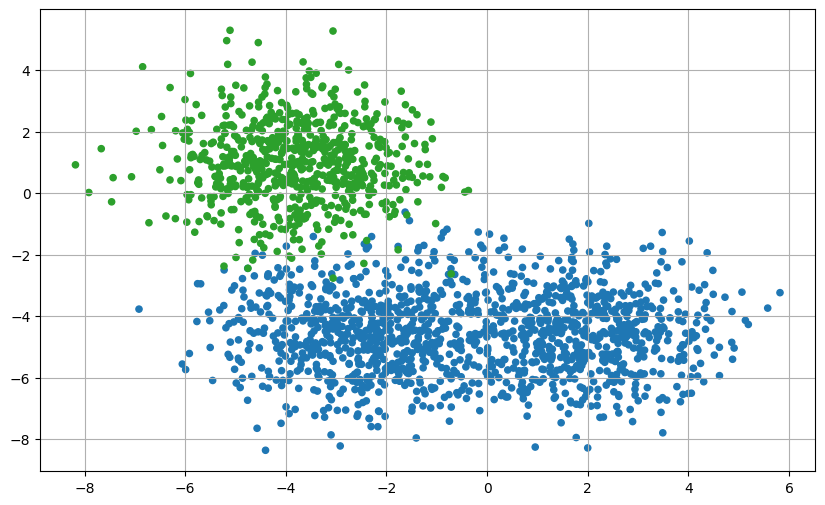

In [143]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.scatter(data[:, 0], data[:, 1], 20, [f'C{int(i) + 1}' for i in data[:, 2]])
plt.grid(True)
plt.show();

# PARTICIONAMOS LOS DATOS Y GUARDAMOS A DISCO

**CONSIGNA 1:** Escriba el código que le permita verificar si los datos están balanceados.

In [144]:
pos = np.sum(data[:, 2] == 1)
neg = np.sum(data[:, 2] == -1)
print(f'Positivos: {pos}, negativos: {neg}')

Positivos: 666, negativos: 1334


Las clases están **desbalanceadas**, hay dos veces mas clases negativas que positivas

**CONSIGNA 2:** Escriba el código para particionar los datos en `train`, `validation` y `test`, y guarde cada conjunto de datos con los nombres `data_trn.csv`, `data_val.csv` y `data_tst.csv` según corresponda. El código debe permitir generar archivos que contengan $75\%$ de los datos para entrenamiento, $15\%$ para validación y $10\%$ para test.

In [145]:
# mezclamos los datos para balancear un poco las clases
np.random.shuffle(data)
train_count = int(data.shape[0] * 0.75)
val_count = int(data.shape[0] * 0.15)
test_count = data.shape[0] - train_count - val_count
# verificamos los tamaños: 75% de 2000 es 1500, 15% es 300 y 10% es 200
print(data.shape[0], train_count, val_count, test_count)
(train, val, test) = np.vsplit(data, [train_count, train_count + val_count])
# verificamos que los datos mantienen su estructura
print(train.shape, val.shape, test.shape)

2000 1500 300 200
(1500, 3) (300, 3) (200, 3)


In [146]:
# guardar los datos a disco
np.savetxt('./data_trn.csv', train, fmt='%f', delimiter=',')
np.savetxt('./data_val.csv', val, fmt='%f', delimiter=',')
np.savetxt('./data_tst.csv', test, fmt='%f', delimiter=',')

# LEVANTAMOS LOS DATOS DE DISCO

**NOTA**: Verifique que la carga de datos se realice correctamente de acuerdo a lo visto en la teoría.

In [147]:
filename_train = 'data_trn.csv'
filename_validation = 'data_val.csv'
filename_test = 'data_tst.csv'

### Entrenamiento

In [148]:
data = pd.read_csv(filename_train, header=None).to_numpy()  # Levanta los datos en formato numpy

#------------------------------------
# INSERTAMOS COLUMNA DEL "BIAS"
#------------------------------------
bias = -np.ones((len(data), 1))
data = np.concatenate((bias, data), axis=1)  # Insertamos el "bias" como primera columna

#------------------------------------
# ALEATORIZO LOS PATRONES (filas)
#------------------------------------
idxs = np.arange(len(data))  # Genero un vector de índices
np.random.shuffle(idxs)
data = data[idxs, :]

#------------------------------------
# SEPARO LOS DATOS
#------------------------------------
X_trn = data[:, :-1]
Y_trn = data[:, -1]  # La clase está en la última columna

In [149]:
# verifico visualmente: X tiene que tener 3 columnas, la primera compuesta solo de -1
print(X_trn.shape) # tiene que ser (1500, 3)
print(np.sum(X_trn[0]==1))

(1500, 3)
0


### Validación

In [150]:
data = pd.read_csv(filename_validation, header=None).to_numpy()  # Levanta los datos en formato numpy

#------------------------------------
# INSERTAMOS COLUMNA DEL "BIAS"
#------------------------------------
bias = -np.ones((len(data), 1))
data = np.concatenate((bias, data), axis=1)  # Insertamos el "bias"

#------------------------------------
# ALEATORIZO LOS PATRONES (filas)
#------------------------------------
idxs = np.arange(len(data))  # Genero un vector de índices
np.random.shuffle(idxs)
data = data[idxs, :]

#------------------------------------
# SEPARO LOS DATOS
#------------------------------------
X_val = data[:, :-1]
Y_val = data[:, -1]  # La clase está en la última columna

In [151]:
# verifico visualmente: X tiene que tener 3 columnas, la primera compuesta solo de -1
print(X_val.shape) # tiene que ser (300, 3)
print(np.sum(X_val[0]==1)) # tiene que ser 0

(300, 3)
0


### Test

In [152]:
data = pd.read_csv(filename_test, header=None).to_numpy()  # Levanta los datos en formato numpy

#------------------------------------
# INSERTAMOS COLUMNA DEL "BIAS"
#------------------------------------
bias = -np.ones((len(data), 1))
data = np.concatenate((bias, data), axis=1)  # Insertamos el "bias"

#------------------------------------
# ALEATORIZO LOS PATRONES (filas)
#------------------------------------
idxs = np.arange(len(data))  # Genero un vector de índices
np.random.shuffle(idxs)
data = data[idxs, :]

#------------------------------------
# SEPARO LOS DATOS
#------------------------------------
X_tst = data[:, :-1]
Y_tst = data[:, -1]  # La clase está en la última columna

In [153]:
# verifico visualmente: X tiene que tener 3 columnas, la primera compuesta solo de -1
print(X_tst.shape) # tiene que ser (200, 3)
print(np.sum(X_tst[0]==1)) # tiene que ser 0

(200, 3)
0


# FUNCIONES AUXILIARES

In [154]:
def Tanh(x):
    '''
    Función tangente hiperbólica [-1,1].
    '''
    return np.tanh(x)


#======================================================
def dTanh(x):
    '''
    Derivada de la función tangente hiperbólica.
    '''
    return 0.5 * (1 - x) * (1 + x)

**CONSIGNA 3:** Escriba el código para una función que le permita calcular, a partir de las salidas deseadas (`Yd`) y predichas (`Yp`) las siguientes medidas:
- TP (Verdaderos Positivos)
- TN (Verdaderos Negativos)
- FP (Falsos positivos)
- FN (Falsos Negativos)
- Accuracy

In [155]:
def medidas(Yd, Yp):
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    for yd, yp in zip(Yd,Yp):
        if yd==1:
            TP += 1 if yp>0 else 0
            FN += 1 if yp<0 else 0
        else:
            TN += 1 if yp<0 else 0
            FP += 1 if yp>0 else 0
    Accuracy = (TP+TN)/len(Yd)
    return (TP, TN, FP, FN, Accuracy)

In [156]:
# Test de medidas
deseadas  = [1,1, 1,1,-1,-1,-1,-1, 1,1,-1,-1,1,-1]
predichas = [1,1,-1,1,-1, 1,-1,-1,-1,1,-1,-1,1,-1]
tp, tn, fp, fn, acc = medidas(deseadas, predichas)
# hay 2 positivas que predijo negativas (falsos negativos), 1 falso positivo, 5 verdaderos positivos y 6 v.neg.
print(f'TP={tp}, TN={tn}, FP={fp}, FN={fn}, Accuracy={acc}')


TP=5, TN=6, FP=1, FN=2, Accuracy=0.7857142857142857


# SETUP EXPERIMENTAL

In [157]:
learning_rate = 0.1

acc = 0.  # Inicializo el accuracy inicial
epoca = 0  # Inicializo contador de épocas

MIN_ACC = 1.0  # Defino mínimo accuracy deseado

MIN_ERROR = 1E6  # Inicializo la variable para
# registrar el mínimo error cometido.

MAX_EPOCAS = 100  # Defino el número máximo de épocas
# de entrenamiento.

MAX_COUNTER = 10  # Defino el máximo número de épocas
# sin mejorar el error de validación
# para detener el entrenamiento.


#=============================================
# ENTRENAMIENTO
#=============================================
error = []  # Inicializo estructura para almacenar
# los errores en el tiempo
accuracy = []  # Inicializo estructura para almacenar
# el accuracy en el tiempo

STOP = False
counter = 0

best_model_weights = None

**CONSIGNA 4:** Escriba el código para inicializar correctamente el perceptrón

In [158]:
W = np.transpose(np.random.rand(3)-0.5)
print(W)

[0.34437316 0.24231295 0.38664984]


# ENTRENAMIENTO

In [159]:
while (epoca < MAX_EPOCAS) and (acc < MIN_ACC) and (not STOP):
    epoca += 1

    #====================================================
    # ENTRENAMIENTO
    #======================
    for idx, (x, yd) in enumerate(zip(X_trn, Y_trn)):
        # Pasada hacia adelante
        yp = np.tanh(W @ x)
        # actualizacion de los pesos
        W = W + 0.5 * learning_rate * dTanh(yp) * (yd - yp) * x

    #====================================================

    #====================================================
    # VALIDACION
    #======================
    N = len(Y_val)
    Yd = np.zeros(N)
    Yp = np.zeros(N)
    e = 0.0
    for idx, (x, yd) in enumerate(zip(X_val, Y_val)):
        # Cálculo de la salida
        yp = Tanh(W @ x)

        # Almaceno las salidas
        Yd[idx] = yd
        Yp[idx] = yp

        e += (yp - yd) ** 2

    e /= N
    #====================================================

    #====================================================
    # CALCULO DE MEDIDAS
    # (TP, TN, FP, FN, ACCURACY)
    #=============================
    tp, tn, fp, fn, acc = medidas(Yd, Yp)

    #====================================================

    #----------------------
    # ALMACENO MEDIDAS
    #----------------------
    error.append(e)
    accuracy.append(acc)

    #-----------------------------------------------
    # CRITERIO DE CORTE Y ALMACENAMIENTO DEL MODELO
    #-----------------------------------------------
    if (e < MIN_ERROR):
        MIN_ERROR = e
        counter = 0

        #·······················
        # Almaceno el modelo
        #·······················
        best_model_weights = W.copy()

    else:
        counter += 1
        if counter > MAX_COUNTER:
            STOP = True

    #--------------------------------------------
    # MUESTRO REPORTE POR PANTALLA (POR EPOCA)
    #--------------------------------------------
    if (epoca % 10) == 0:
        print(f'Epoca: {epoca} -- Error: {e:.4} -- Tasa acierto [train]: {acc}\n')
#===============================================================

#--------------------------------------------
# MUESTRO REPORTE POR PANTALLA (FINAL)
#--------------------------------------------
print('=' * 83)
print(f'FINAL -- Epoca: {epoca} -- Error: {e:.4} -- Tasa acierto [train]: {acc:.4} -- Contador: {counter}')
print('=' * 83)

#----------------------------------------------
# GUARDAMOS LOS PESOS DEL MEJOR MODELO A DISCO
#----------------------------------------------
np.savetxt('best_model_weights.csv', best_model_weights, delimiter=',')

Epoca: 10 -- Error: 0.02115 -- Tasa acierto [train]: 0.9933333333333333

Epoca: 20 -- Error: 0.0181 -- Tasa acierto [train]: 0.9933333333333333

Epoca: 30 -- Error: 0.01757 -- Tasa acierto [train]: 0.9933333333333333

Epoca: 40 -- Error: 0.01743 -- Tasa acierto [train]: 0.9933333333333333

Epoca: 50 -- Error: 0.01741 -- Tasa acierto [train]: 0.9933333333333333

Epoca: 60 -- Error: 0.01743 -- Tasa acierto [train]: 0.9933333333333333

FINAL -- Epoca: 60 -- Error: 0.01743 -- Tasa acierto [train]: 0.9933 -- Contador: 11


### Graficación

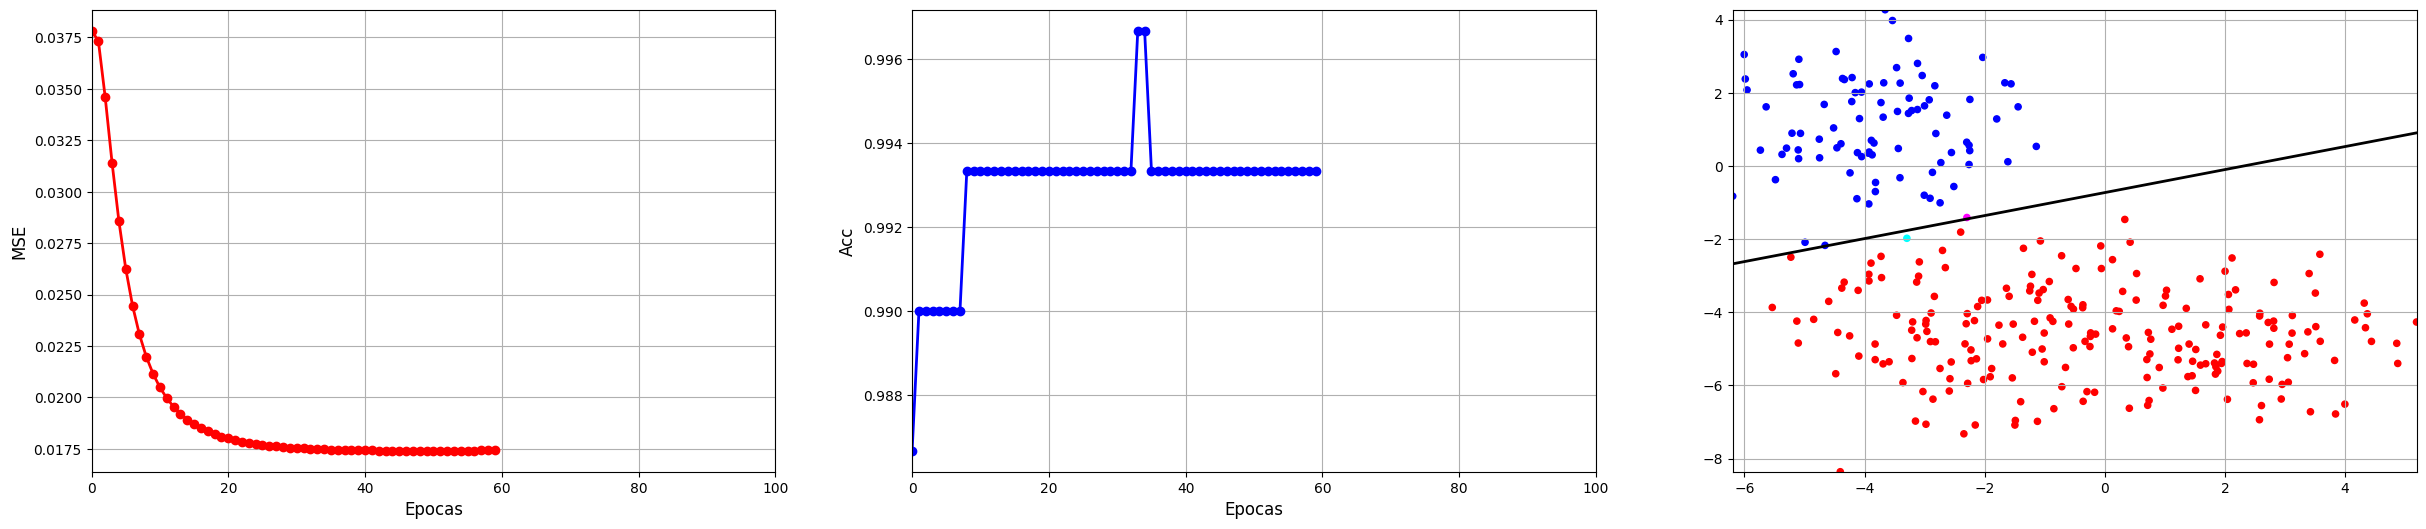

In [160]:
fig, ax = plt.subplots(1, 3, figsize=(30, 6))

epocas = np.arange(epoca)

# ERROR
ax[0].plot(epocas, error, 'o-r', lw=2)
ax[0].grid(True)
ax[0].set_xlim(0, MAX_EPOCAS)
ax[0].set_xlabel('Epocas', fontsize=12)
ax[0].set_ylabel('MSE', fontsize=12)

# ACC
ax[1].plot(epocas, accuracy, 'o-b', lw=2)
ax[1].grid(True)
ax[1].set_xlim(0, MAX_EPOCAS)
ax[1].set_xlabel('Epocas', fontsize=12)
ax[1].set_ylabel('Acc', fontsize=12)

# CLASIFICACION

C = []
for i in range(len(Yd)):
    if (np.sign(Yd[i]) == np.sign(Yp[i])) and (Yd[i] == 1):
        C.append('blue')
    if (np.sign(Yd[i]) == np.sign(Yp[i])) and (Yd[i] == -1):
        C.append('red')
    if (np.sign(Yd[i]) != np.sign(Yp[i])) and (Yd[i] == 1):
        C.append('cyan')
    if (np.sign(Yd[i]) != np.sign(Yp[i])) and (Yd[i] == -1):
        C.append('magenta')

ax[2].scatter(X_val[:, 1], X_val[:, 2], 20, C)

#-----------------------------------------------
# CONSTRUCCION DE LA FRONTERA DE DECISION
x = np.array([X_val[:, 1].min(), X_val[:, 1].max()])
b = W[0] / W[2]
m = W[1] / W[2]

ax[2].plot(x, b - m * x, '-k', lw=2)
ax[2].set_xlim(X_val[:, 1].min(), X_val[:, 1].max())
ax[2].set_ylim(X_val[:, 2].min(), X_val[:, 2].max())
ax[2].grid(True)

# TEST

In [161]:
#=====================================
# LEVANTAMOS DE DISCO EL MEJOR MODELO
#=====================================
w = np.loadtxt('best_model_weights.csv', delimiter=',')

#====================================================
# TESTEO
#======================
N = len(Y_tst)
Yd = np.zeros(N)
Yp = np.zeros(N)

for idx, (x, yd) in enumerate(zip(X_tst, Y_tst)):
    # Cálculo de la salida
    yp = np.tanh(w @ x)

    # Cálculo de las métricas
    Yd[idx] = yd
    Yp[idx] = yp

#====================================================
# CALCULO DE MEDIDAS
# (TP, TN, FP, FN, ACCURACY)
#=============================
tp, tn, fp, fn, acc = medidas(Yd, Yp)

print('\nTasa acierto [test]: {}\n'.format(acc))

print('Pesos [W]: {}\n\n'.format(W))


Tasa acierto [test]: 0.99

Pesos [W]: [-1.90713772 -0.82261858  2.6156664 ]




### Graficación

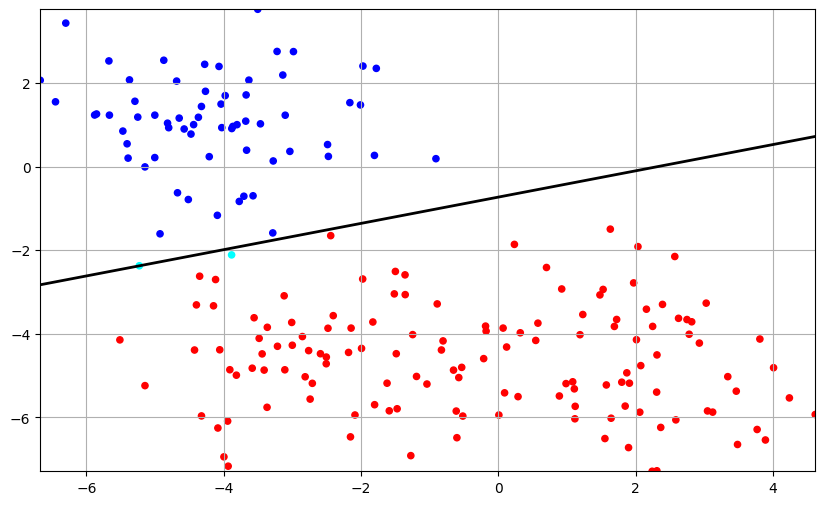

In [162]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

C = []
for i in range(len(Yd)):
    if (np.sign(Yd[i]) == np.sign(Yp[i])) and (Yd[i] == 1):
        C.append('blue')
    if (np.sign(Yd[i]) == np.sign(Yp[i])) and (Yd[i] == -1):
        C.append('red')
    if (np.sign(Yd[i]) != np.sign(Yp[i])) and (Yd[i] == 1):
        C.append('cyan')
    if (np.sign(Yd[i]) != np.sign(Yp[i])) and (Yd[i] == -1):
        C.append('magenta')

ax.scatter(X_tst[:, 1], X_tst[:, 2], 20, C)

#-----------------------------------------------
# CONSTRUCCION DE LA FRONTERA DE DECISION
x = np.array([X_tst[:, 1].min(), X_tst[:, 1].max()])
b = W[0] / W[2]
m = W[1] / W[2]

ax.plot(x, b - m * x, '-k', lw=2)
ax.set_xlim(X_tst[:, 1].min(), X_tst[:, 1].max())
ax.set_ylim(X_tst[:, 2].min(), X_tst[:, 2].max())
ax.grid(True)